In [6]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=2000
duration = 1000
nproc=70
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1
method='multiprocessing'

def write(name,obs):
    f=open(name,'w')
    data = np.array(obs.data()).T
    np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
    f.close()        
    print('saving into',name)        
    e=open(name+'_err','w')        
    err = np.array(obs.error()).T        
    np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
    e.close()
    print('saving into',name+'_err')

def singlerun(rm,D,solver='ode',intrinsic=False,simrun=1):   
    print(solver)
    V = L**3 
    if solver=='spa':
        solver=("spatiocyte",rm)
        V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)    
    keff = k0/Ca/Cb
    Nb=int(Cb*V)
    kd = 4*np.pi*rm*2*D*2
    ka = keff*kd/(kd-keff)
    assert(ka>0)
    with species_attributes():
        A | {'D': D, 'radius':rm}
        B | {'D': D, 'radius':rm}

    with reaction_rules():
        ~A > A | k0
        A + B >B | (ka if intrinsic else keff)
    m = get_model()
    print('rm={:.3},D={:.3}'.format(rm,D))
    print('kon={:.3},ka={:.3},kd={:.3},keff={:.3},kfactor={:.3},V={:.3}'.format(k0,ka,kd,keff,ka/kd,V))
    if simrun >1    :
        obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':Nb},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
    else:
        obs=run_simulation(duration,model=m,y0={'B':Nb},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
    data = np.array(obs.data()).T
    print('mean [A]',np.mean(data[1][50:])/V)   
    write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_D{:.3}_L{:.3}'.format(rm,D,L),obs)
    return obs

#obs1=singlerun(0.005,0.1,'spa',True,simrun)   
obs2=singlerun(0.05,0.1,'spa',True,simrun)   
obs3=singlerun(0.05,0.01,'spa',True,simrun)   
obs4=singlerun(0.1,0.01,'spa',True,simrun)   
obs5=singlerun(0.1,0.1,'spa',True,simrun)   
obs6=singlerun(0.1,0.005,'spa',True,simrun)   
    

spa
rm=0.05,D=0.1
kon=0.1,ka=0.0217,kd=0.251,keff=0.02,kfactor=0.0865,V=1.1e+02
mean [A] 4.99321079978
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_D0.1_L4.64
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_D0.1_L4.64_err
spa
rm=0.05,D=0.01
kon=0.1,ka=0.0979,kd=0.0251,keff=0.02,kfactor=3.9,V=1.1e+02
mean [A] 4.65316198491
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_D0.01_L4.64
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_D0.01_L4.64_err
spa
rm=0.1,D=0.01
kon=0.1,ka=0.0332,kd=0.0503,keff=0.02,kfactor=0.661,V=1.14e+02
mean [A] 4.60130622123
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.1_D0.01_L4.64
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.1_D0.01_L4.64_err
spa
rm=0.1,D=0.1
kon=0.1,ka=0.0208,kd=0.503,keff=0.02,kfactor=0.0414,V=1.14e+02
mean [A] 4.9796606346
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.1_D0.1_L4.64
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.1_D0.1_L4.64_err
spa
rm=0.1,D=0.005
kon=0.1,ka

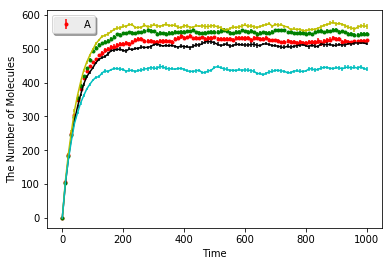

In [3]:
viz.plot_number_observer(obs4,'r.',obs2,'g.',obs3,'k-',obs5,'y-',obs6,'c-')